In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

#입력 데이터 파일은 읽기 전용 "에서 사용할 수 있습니다. /입력/" 디렉토리
#예를 들어 실행 중이거나 이동+Enter를 눌러 입력 디렉터리 아래에 모든 파일이 나열됩니다.

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
train=pd.read_csv('train_s.csv')
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
test=pd.read_csv('test_s.csv')
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [5]:
print(train.shape)
print(test.shape)

(245725, 11)
(105312, 10)


In [6]:
train.isna().sum()#결측값을 확인하여 그 결과를 true or false로 반환
#NA, None, numpy.nan은 True 값에 해당하고, 그 외 나머지는 False에 해당

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [8]:
#null 값의 비율
(train['Credit_Product'].isna().sum()/train['Credit_Product'].count())

0.13551293900184844

In [10]:
(test['Credit_Product'].isna().sum()/test['Credit_Product'].count())

0.13494988684125445

In [12]:
train.drop('ID', axis=1, inplace=True)
test.drop('ID', axis=1, inplace=True)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Gender               245725 non-null  object
 1   Age                  245725 non-null  int64 
 2   Region_Code          245725 non-null  object
 3   Occupation           245725 non-null  object
 4   Channel_Code         245725 non-null  object
 5   Vintage              245725 non-null  int64 
 6   Credit_Product       216400 non-null  object
 7   Avg_Account_Balance  245725 non-null  int64 
 8   Is_Active            245725 non-null  object
 9   Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 18.7+ MB


열을 범주형 및 숫자로 나누기 하여 EDA를 더 쉽게 사용할 수 있습니다.

In [14]:
cat_cols=[col for col in train.columns if train[col].dtype=='object']
num_cols=[col for col in train.columns if train[col].dtype!='object']
num_cols.remove('Is_Lead')
print(cat_cols)
print(num_cols)

['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']
['Age', 'Vintage', 'Avg_Account_Balance']


### Exploratory Data Analysis

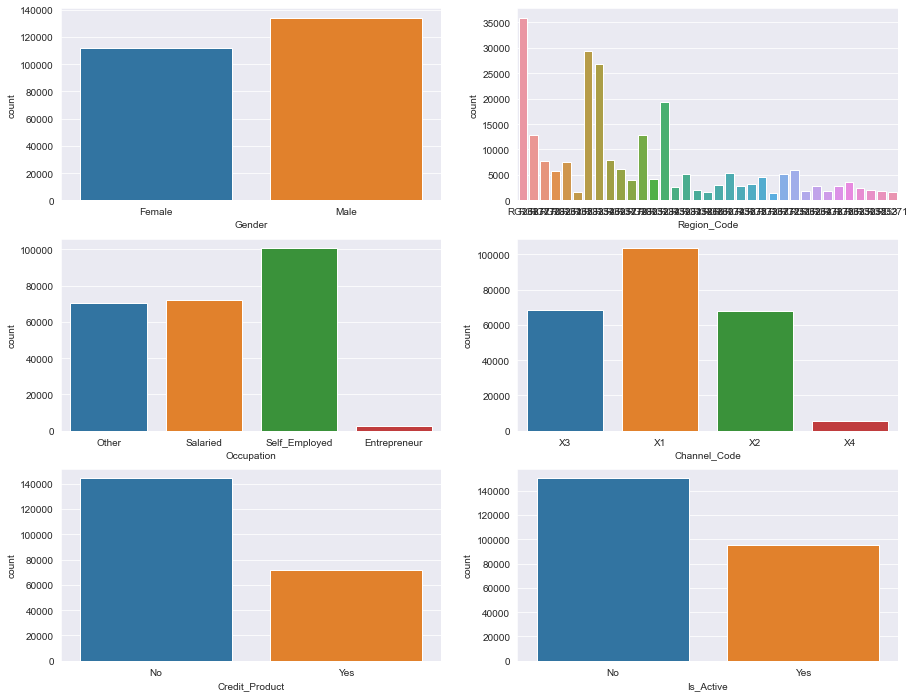

In [16]:
plt.figure(figsize=(15,12))
i=1
for col in cat_cols:
    plt.subplot(3,2,i)
    sns.countplot(train[col])
    i+=1

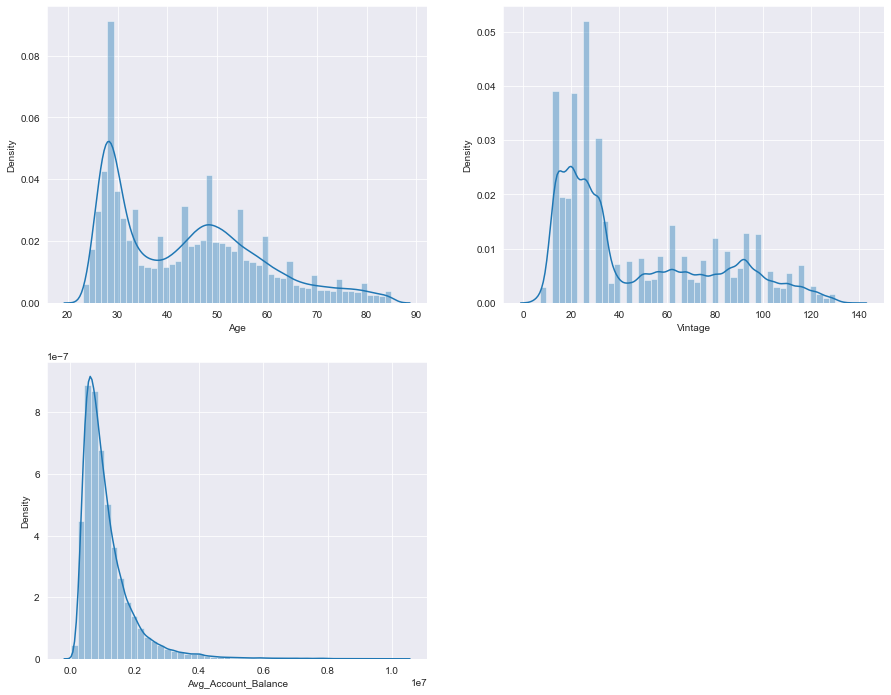

In [20]:
plt.figure(figsize=(15,12))
i=1
for col in num_cols:
    plt.subplot(2,2,i)
    sns.distplot(train[col])
    i+=1

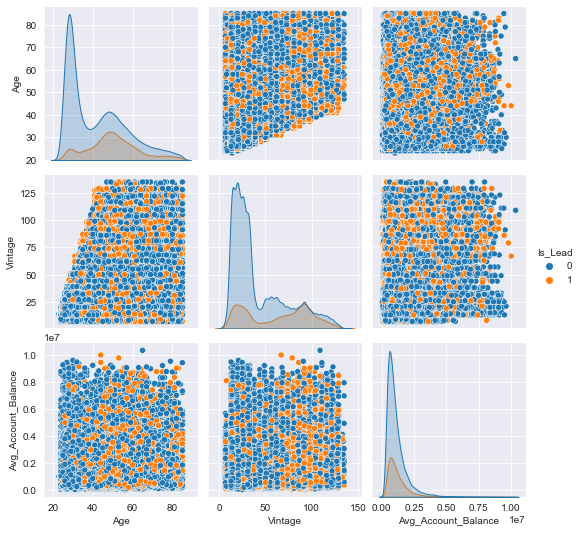

In [21]:
sns.pairplot(train,hue='Is_Lead')

인사이트: 데이터가 왜곡됩니다.

In [22]:
train['Avg_Account_Balance']=np.log(train['Avg_Account_Balance'])
train['Vintage']=np.log(train['Vintage'])
test['Avg_Account_Balance']=np.log(test['Avg_Account_Balance'])
test['Vintage']=np.log(test['Vintage'])
# 입력 어레이의 자연 로그 (natural logarithm) 값을 반환

In [25]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()

train[['Vintage', 'Avg_Account_Balance', 'Age', 'Region_Code']]= ss.fit_transform(train[['Vintage', 'Avg_Account_Balance', 'Age', 'Region_Code']])
test[['Vintage', 'Avg_Account_Balance','Age', 'Region_Code']]= ss.transform(test[['Vintage', 'Avg_Account_Balance', 'Age', 'Region_Code']])
train.head()

ValueError: could not convert string to float: 'RG268'

<AxesSubplot:xlabel='Avg_Account_Balance', ylabel='Density'>

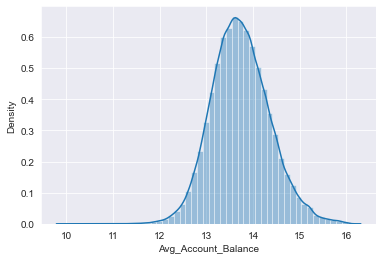

In [26]:
sns.distplot(train['Avg_Account_Balance'])

<AxesSubplot:xlabel='Avg_Account_Balance', ylabel='Density'>

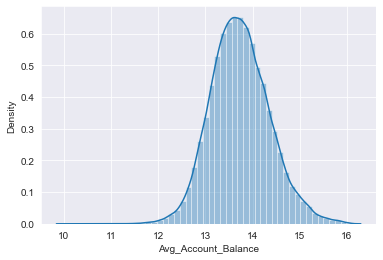

In [27]:
sns.distplot(test['Avg_Account_Balance'])

<AxesSubplot:xlabel='Vintage', ylabel='Density'>

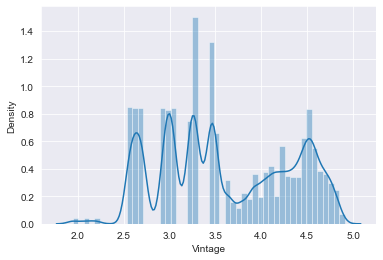

In [28]:
sns.distplot(train['Vintage'])

<AxesSubplot:xlabel='Vintage', ylabel='Density'>

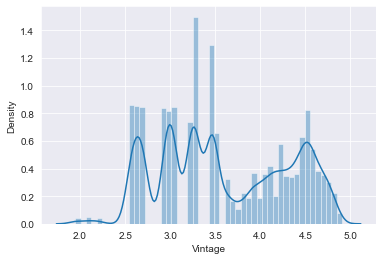

In [29]:
sns.distplot(test['Vintage'])

In [32]:
from sklearn.model_selection import train_test_split

X= train.drop('Is_Lead', axis=1)
y= train['Is_Lead']

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, stratify=y)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report

계산 단순성을 위해 로지스틱 회귀및 랜덤포레스트만 사용합니다. SVM 및 기타 분류기는 훈련에 많은 시간이 걸렸기 때문에 여기에서 이 것으로 가기로 결정했습니다.

In [36]:
lr = LogisticRegression()

lr.fit(X_train, y_train)
y_pred= lr.predict(X_test)

print(roc_auc_score(y_train, lr.predict(X_train)))
print(roc_auc_score(y_test, y_pred))

ValueError: could not convert string to float: 'Female'

In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Gender               105312 non-null  object 
 1   Age                  105312 non-null  int64  
 2   Region_Code          105312 non-null  object 
 3   Occupation           105312 non-null  object 
 4   Channel_Code         105312 non-null  object 
 5   Vintage              105312 non-null  float64
 6   Credit_Product       92790 non-null   object 
 7   Avg_Account_Balance  105312 non-null  float64
 8   Is_Active            105312 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 7.2+ MB


In [39]:
rfc= RandomForestClassifier()

rfc.fit(X_train, y_train)
y_pred= rfc.predict(X_test)

print(roc_auc_score(y_train, rfc.predict(X_train)))
print(roc_auc_score(y_test, y_pred))

ValueError: could not convert string to float: 'Female'

In [40]:
from sklearn.model_selection import RandomizedSearchCV

params= {'C':[0.001, 0.01, 0.1, 1],
        'max_iter':[100,200,500]}

random_lr= RandomizedSearchCV(lr, param_distributions= params, cv=5, scoring='roc_auc', random_state=42)

In [41]:
random_lr.fit(X_train,y_train)

ValueError: could not convert string to float: 'Female'